In [2]:
import numpy as np
import scipy
import sys
import math
import scipy.special
import scipy.constants as const
from math import factorial
from scipy.special import hermite
import matplotlib.pyplot as plt
import random
import importlib
from libraryMetropolis import delta_choice
from libraryMetropolis import Metropolis
from libraryMetropolis import kinetic_energy_integrand
from libraryMetropolis import numerical_integrand
from libraryMetropolis import total_wf
from libraryMetropolis import kinetic_energy_integrand_2

import libraryMetropolis as lib
importlib.reload(lib)

<module 'libraryMetropolis' from '/Users/bellamarco01/uni/2_computational/computational_physics/homework 4/libraryMetropolis.py'>

We developed a library (from which we import the relevant functions) called libraryMetropolis

In order to find the values of $\alpha$ that satisfy the cusp condition we notice that
$$lim_{r_{ij}\rightarrow 0}\frac{H\Psi}{\Psi}<\infty$$
where $H=H_0+V$ ,is equivalent to 
$$lim_{r_{ij}\rightarrow 0}\frac{\Psi'}{\Psi}=\frac{1}{2}r_{ij}V$$
having
$$V=\frac{1}{2}\omega^2r_i^2+\frac{1}{r_{ij}}$$
Substituting in this condition the Jastrow function for antiparallel spins and Jastrow function multiplied by $r$ fo parallel spins we find 
$$\alpha_{\uparrow\downarrow}=\frac{1}{2}$$
$$\alpha_{\uparrow\uparrow}=\frac{1}{4}$$




Since we are interested in the cases up to $N=6$ let's consider only the lower eergy states in analitycal form, using the notation $\phi_{nlm}$
$$\phi_{000}=\frac{1}{\sqrt{\pi\sigma^2}}e^{-\frac{r^2}{2\sigma^2}}$$ 
$$\phi_{01-1}=\frac{1}{\sqrt{\pi\sigma^2}}e^{-\frac{r^2}{2\sigma^2}}\left(\frac{r}{\sigma}\right)e^{-i\varphi}$$ 
$$\phi_{011}=\frac{1}{\sqrt{\pi\sigma^2}}e^{-\frac{r^2}{2\sigma^2}}\left(\frac{r}{\sigma}\right)e^{i\varphi}$$ 
Now we can write 
$$e^{i\varphi}=cos\varphi+isin\varphi=\frac{x}{\sqrt{x^2+y^2}}+i\frac{y}{\sqrt{x^2+y^2}}$$
$$e^{-i\varphi}=cos\varphi-isin\varphi=\frac{x}{\sqrt{x^2+y^2}}-i\frac{y}{\sqrt{x^2+y^2}}$$
And so we find
$$\phi_{000}=\frac{1}{\sqrt{\pi\sigma^2}}e^{-\frac{x^2+y^2}{2\sigma^2}}$$ 
$$\phi_{01-1}=\frac{1}{\sqrt{\pi\sigma^2}}e^{-\frac{x^2+y^2}{2\sigma^2}}\left(\frac{\sqrt{x^2+y^2}}{\sigma}\right)\left(\frac{x}{\sqrt{x^2+y^2}}-i\frac{y}{\sqrt{x^2+y^2}}\right)=\frac{1}{\sqrt{\pi\sigma^2}}e^{-\frac{x^2+y^2}{2\sigma^2}}\left(\frac{1}{\sigma}\right)\left(x-iy\right)$$ 
$$\phi_{011}=\frac{1}{\sqrt{\pi\sigma^2}}e^{-\frac{x^2+y^2}{2\sigma^2}}\left(\frac{\sqrt{x^2+y^2}}{\sigma}\right)\left(\frac{x}{\sqrt{x^2+y^2}}+i\frac{y}{\sqrt{x^2+y^2}}\right)=\frac{1}{\sqrt{\pi\sigma^2}}e^{-\frac{x^2+y^2}{2\sigma^2}}\left(\frac{1}{\sigma}\right)\left(x+iy\right)$$ 

In the end we can construct two new orbitals, namely
$$\chi_+=\frac{\phi_{011}+\phi_{01-1}}{2}=\frac{1}{\sqrt{\pi\sigma^2}}e^{-\frac{x^2+y^2}{2\sigma^2}}x$$
$$\chi_-=\frac{\phi_{011}-\phi_{01-1}}{2i}=\frac{1}{\sqrt{\pi\sigma^2}}e^{-\frac{x^2+y^2}{2\sigma^2}}y$$

Let's make a test of the Metroplis algorithm to check the stability. We'll plot the acceptance rate which we expect to be in the range (40%,60%) and the kinetic energy calculated in bith ways proposed in Point2.

We'll neglect the inital moves in the MC in order to have more stable results.

## part 2: calculation of the kinetic energy

Using
\begin{align*}
  \nabla ^2 (fg) = \left( \nabla ^2 f    \right) g + 2\boldsymbol{\nabla}f \cdot 
  \boldsymbol{\nabla}g + f \nabla ^2g
\end{align*}
   The kinetic energy
\begin{align*}
       \nabla ^2 \Psi &=  \nabla ^2 \left(J D_\uparrow D_\downarrow\right)\nonumber \\ 
       &= \sum_i \left[   \left(\nabla _i ^2J\right)D_\uparrow D_\downarrow +
       2\boldsymbol{\nabla}_i J \cdot  \boldsymbol{\nabla}_i (D_\uparrow
       D_\downarrow) +
       J((\nabla ^2_i D_\uparrow) D_\downarrow + D_\uparrow \nabla_i ^2
       D_\downarrow)\right]
\end{align*}
The first term is computed as
\begin{align*}
    \nabla ^2_i J &= \nabla ^2 _i \prod_{j<k} e^{\log f_{jk}}\nonumber \\ 
    &=\nabla_i ^2 \exp \sum_{j < k} f_{jk} = \nabla _i ^2 \exp \left(\frac{1}{2}\sum_{i\neq
    k}f_{jk}\right)
\end{align*}
We exploit the identity
\begin{align*}
    \nabla^2 f(g(\textbf{x})) &= f^{\prime\prime} (g(\textbf{x}))
   \left|\boldsymbol{\nabla}g(x)\right|^2  + f^\prime (g(\textbf{x})) \nabla ^2 g.
\end{align*}
(Skipping a few lines of algebra), I find
\begin{align*}
    \nabla _i ^2 J &= J \left(\left|\sum_{k\neq i}\frac{f^\prime
    _{ki}}{f_{ki}}\hat{\textbf{x}}_{jk}\right|^2 + \sum_{k\neq i}\nabla _i ^2 \log f_{ki}\right)
\end{align*}
where
\begin{align*}
    \nabla _i ^2 \log f_{ki} &= \frac{f^{\prime\prime}_{ki}}{f_{ki}} -
    \frac{(f_{ki}^\prime )^2}{f_{ki}^2} + \frac{1}{r_{ki}} \frac{f_{ki}^\prime }{f_{ki}}.
\end{align*}

Then 
\begin{align*}
    \boldsymbol{\nabla} J \cdot \boldsymbol{\nabla} \left(D_\uparrow D_\downarrow\right)
    &= \sum_{i} \left(\nabla _i J\right)\nabla _i\left(D_\uparrow D_\downarrow\right).
\end{align*}
The gradient of Jastrow is
\begin{align*}
    \nabla _i J &= J \nabla _i \log J\nonumber \\ 
    &= \frac{1}{2}J \nabla _i \left(\sum_{jk,j\neq k} \ln f_{jk}\right)\nonumber \\ 
    &= J\sum_{k,k\neq i} \frac{f_{ik}^\prime }{f_{ik}} \hat{\textbf{r}}_{ik}
\end{align*}
where the $1 /2$ (coming from  $2\sum_{j<k} = \sum_{j\neq k}$) is reabsorbed since we get
two equal terms: one from $i=j$ and one from $i=k$.

The gradient of Slater can be computed from known matrix calculus relations:
\begin{align*}
\frac{1}{\left|D\right|}\boldsymbol{\nabla}_i \left|D(\textbf{R})\right|    &= \sum _j
\boldsymbol{\nabla}_i \phi_j (\textbf{r}_i) d_{ji}^{-1}(\textbf{R})
\end{align*}
and the gradient of a single wavefunction
\begin{align*}
    \boldsymbol{\nabla}_i \phi_{000} (r_i)& =
    -\frac{\textbf{r}_i}{\sigma^2}\phi_{000}\nonumber \\
    \boldsymbol{\nabla}_i \chi_{+} &= \begin{bmatrix} 1- x_{i}^2/\sigma^2 \\ -x_i y_i /
    \sigma^2
\\\end{bmatrix} \frac{1}{\sigma^2 \sqrt{\pi} } e^{- (x_{i}^2 +y_{i}^2) / 2 \sigma^2}\nonumber \\ 
    \boldsymbol{\nabla}_i \chi_{-} &= \begin{bmatrix} -x y/\sigma^2 \\ 1 -y_i ^2 /
    \sigma^2
\\\end{bmatrix} \frac{1}{\sigma^2 \sqrt{\pi} } e^{- (x^2 +y^2) / 2 \sigma^2}.
\end{align*}
Finally for the Slater laplacian term, we employ a similar result:
\begin{align*}
\frac{1}{\left|D\right|}\nabla ^2_i \left|D(\textbf{R})\right|    &= \sum _j
\nabla^2_i \phi_j (\textbf{r}_i) d_{ji}^{-1}(\textbf{R})
\end{align*}
where the single-particle laplacians are found via the equations of motion
\begin{align*}
  \left(  -\frac{1}{2}\nabla_i ^2 +\frac{1}{2}\omega^2 r_i^2\right) \phi_j (r_i) =
  \lambda_j \phi_j
  (r_i)
\end{align*}
or 
\begin{align*}
    \nabla_i ^2 \phi_j (r_i) = \left(\omega^2 r_i^2 - 2\lambda_j\right)\phi_j(r_i)
\end{align*}
for 
\begin{align*}
    \lambda_j = \omega (2n + l + 1).
\end{align*}
These calculations, put together, give us the first way of computing the integrand of the
kinetic energy.

For the second way of computing the kinetic energy, all the pieces are actually already there. We are lacking the
\begin{align}
    \frac{1}{4\Psi ^2}\left( \sum_i \nabla_i \Psi \right) ^2 = \frac{1}{4} \left[\sum_i\left(\frac{\nabla J}{J} + \frac{\nabla D_\uparrow}{D_\uparrow}+ \frac{\nabla D_\downarrow}{D_\downarrow}\right) \right]^2
\end{align}

## example run
Parameters:

In [11]:
sigma=1 # Standard deviation for the Gaussian wave function
N=2 # Number of particles
N_up=lib.N_up_choice(N) # Number of up-spin particles
R = np.zeros((N,2)) # initialise positions of particles, R[x o y][particella]
acc, counter=0,0
R = np.random.uniform(0, 1, size=(N, 2)) # Randomly initialize positions of particles in a 2D space
        
delta=1 # Step size for the Metropolis algorithm
b_par = 1 # variational Parameter for the wave function
b_anti = 1 # variational Parameter for the antiparallel part of the jastrow function
omega=1 # Frequency for the harmonic oscillator
jj= False                    # use or not Jastrow
moves=20000
Neq=int(moves*3/10)
N_delta=1000
acc_list = []
kinetic_energy1=[]
kinetic_energy2=[]
potential = []
E_tot=[]
E_tot2=[]
x1=[]
y1=[]
kinen1=0
kinen2=0
energy=0
energy2=0
h=0.0001

define the wavefunction as only a function of R:

In [5]:
def f(r): 
    return total_wf(N, N_up, r, sigma, b_par, b_anti, use_chi=True, return_A=False)[0]

define potential energy

In [6]:
def potential_energy(omega,R):
    pot=0
    for i in range(len(R)):
        r = R[i][0]**2 + R[i][1]**2
        pot+=0.5*omega**2*r

    return pot

Initialise a metropolis run. We compute the kinetice energy in both ways, calling 

 kinetic_energy_integrand

 kinetic_energy_integrand_2


In [13]:
delta = delta_choice(N, N_up,R, sigma, b_par, b_anti, delta, counter, acc,N_delta,jj)

for i in range(moves):
    R,acc, counter = Metropolis(N, N_up, R, sigma, b_par, b_anti, delta, counter, acc ,jj)
    Kin = kinetic_energy_integrand(N,N_up,R,sigma,b_par,b_anti,omega,use_chi=True)
    Kin2 = kinetic_energy_integrand_2(N,N_up,R,sigma,b_par,b_anti,omega,use_chi=True)
    pot_en = potential_energy(omega,R)

    
    if i>=Neq:
        kinen1+=Kin
        kinen2+=Kin2
        energy += (Kin+pot_en)
        energy2 += (Kin2+pot_en)
        E_tot.append((1/(i-Neq+1))*(energy))
        E_tot2.append((1/(i-Neq+1))*(energy2))
        kinetic_energy1.append((1/(i-Neq+1))*(kinen1))
        kinetic_energy2.append((1/(i-Neq+1))*(kinen2))

    acc_list.append(acc/counter)


print(f'sigma={sigma},\u0394={round(delta,3)}')


sigma=1,Δ=1.331


Text(0.5, 1.0, 'Accuracy')

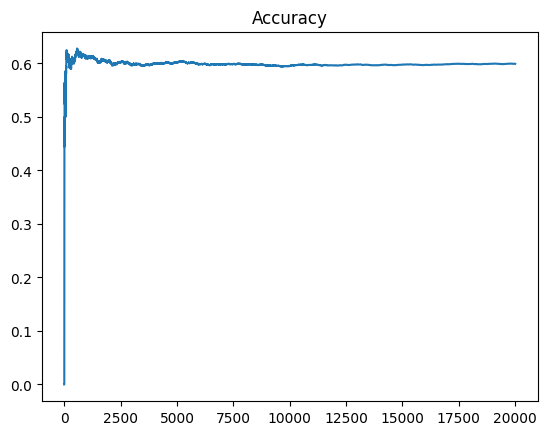

In [14]:
plt.plot(acc_list)
plt.title('Accuracy')

Text(0.5, 1.0, 'Total energy')

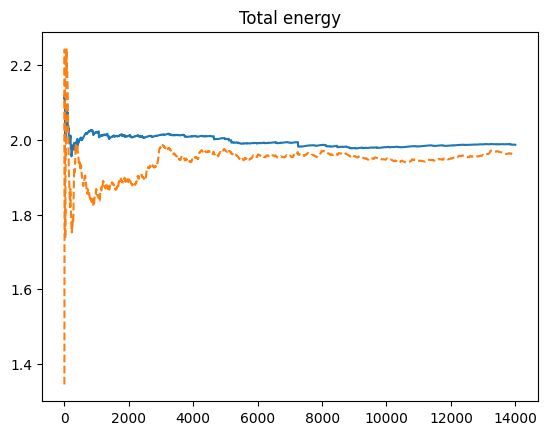

In [15]:
plt.plot(E_tot)
plt.plot(E_tot2,'--')
plt.title('Total energy')

We can see that the two types of calculations converge to the same integer. In other cases, kinetic_energy_integrand_2 was tweaking fr, and thus we decided to stick to kinetic_energy_integrand for the rest of the analysis.

More speficically, the second way of computing tends to output larger numbers (O(1000) vs the O(1) of kinetic_energy_integrand), and seems to produce some ~1% discrepancy with numerical estimates (finite differences) for the local kinetic energy. For comparison, finite-difference estimates of the other type of calculation agree to 8 significant digits. All these calculations are in the "man_vs_machine.ipynb" notebook, where all analytical calculations here implemented are tested against numerical estimates.

## Spectrum without jastrow
Now in the frameset without Jastrow factor let's plot the spectrum, for several values of N,N_up to check convergence. Then we will generalise

In [16]:
sigma=1
N_up=0

R = np.zeros((N,2))
acc, counter=0,0
for i in range(len(R)):
    for j in range(len(R[0])):
        R[i][j]=random.uniform(0,1)   #r[x o y][particella]
        
delta=1
b_par = 1
b_orth = 1
omega=1
jj= False                    # use or not Jastrow
moves=100000
Neq=int(moves*3/10)
N_delta=1000

acc_list20 = []
acc_list21 = []
acc_list30 = []
acc_list31 = []
acc_list32 = []


E_tot20=[]
E_tot21=[]
E_tot30=[]
E_tot31=[]
E_tot32=[]
E_tot40=[]
E_tot41=[]
E_tot42=[]
E_tot43=[]
E_tot50=[]
E_tot51=[]
E_tot52=[]
E_tot53=[]
E_tot54=[]

for j in range(2,4):
    for k in range(j):
        energy=0
        R = np.zeros((j,2))
        acc, counter=0,0
        for t in range(len(R)):
            for l in range(len(R[0])):
                R[t][l]=random.uniform(0,1)   #r[x o y][particella]


        delta = delta_choice(j, k, R, sigma, b_par, b_orth, delta, counter, acc,N_delta,jj)

        for i in range(moves):
            R,acc, counter = Metropolis(j, k, R, sigma, b_par, b_orth, delta, counter, acc ,jj)
            Kin = kinetic_energy_integrand(j,k,R,sigma,b_par,b_orth,omega,use_chi=True)
            pot_en = potential_energy(omega,R)
       
            if i>=Neq:
                energy += (Kin+pot_en)
                if j == 2:
                    if k==0:
                        E_tot20.append((1/(i-Neq+1))*(energy))
                        acc_list20.append(acc/counter)
                    elif k==1:
                        E_tot21.append((1/(i-Neq+1))*(energy))
                        acc_list21.append(acc/counter)
                elif j==3:
                    if k==0:
                        E_tot30.append((1/(i-Neq+1))*(energy))
                        acc_list30.append(acc/counter)
                    elif k==1:
                        E_tot31.append((1/(i-Neq+1))*(energy))
                        acc_list31.append(acc/counter)
                    elif k==2:
                        E_tot32.append((1/(i-Neq+1))*(energy))
                        acc_list32.append(acc/counter)        


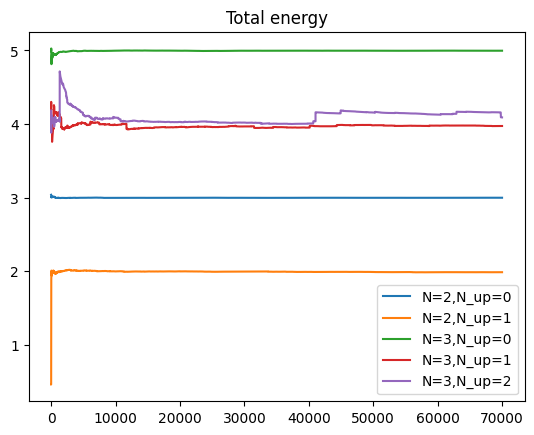

In [18]:
plt.plot(np.array(range(moves-Neq)),E_tot20,label='N=2,N_up=0')
plt.plot(np.array(range(moves-Neq)),E_tot21,label='N=2,N_up=1')
plt.plot(np.array(range(moves-Neq)),E_tot30,label='N=3,N_up=0')
plt.plot(np.array(range(moves-Neq)),E_tot31,label='N=3,N_up=1')
plt.plot(np.array(range(moves-Neq)),E_tot32,label='N=3,N_up=2')
plt.title('Total energy')
plt.legend(loc="lower right")

All values N=2,...,6, all possible N_up cases:

In [218]:
import numpy as np
import random
from collections import defaultdict

# --- fixed parameters ------------------------------------------------------
SIGMA     = 1.0
B_PAR     = 1.0
B_ORTH    = 1.0
OMEGA     = 1.0
JJ        = False
MOVES     = 100_000
NEQ       = int(MOVES * 0.3)       # 30 % equilibration
N_DELTA   = 1_000
DELTA0    = 1.0                    # initial Metropolis step

# ---------------------------------------------------------------------------

def random_positions(N, low=0.0, high=1.0):
    """Uniform random (N,2) array in [low,high)."""
    return np.random.uniform(low, high, size=(N, 2))

def run_vmc(N, N_up):
    """Run one VMC chain and return running E and acceptance fractions."""
    N_down = N - N_up
    R      = random_positions(N)
    delta  = DELTA0

    acc = counter = 0

    # adapt delta once at the beginning
    delta = delta_choice(N, N_up, R, SIGMA, B_PAR, B_ORTH,
                         delta, counter, acc, N_DELTA, JJ)

    e_running   = 0.0   # cumulative energy after equilibration
    measurements = 0    # number of post‑equil steps
    acc_track    = []   # store acceptance ratio per measurement

    for step in range(MOVES):
        R, acc, counter = Metropolis(
            N, N_up, R, SIGMA, B_PAR, B_ORTH, delta,
            counter, acc, JJ
        )

        K  = kinetic_energy_integrand(N, N_up, R,
                                      SIGMA, B_PAR, B_ORTH, OMEGA,
                                      use_chi=True)
        V  = potential_energy(OMEGA, R)

        if step >= NEQ:                          # collect statistics
            measurements += 1
            e_running    += (K + V)
            acc_track.append(acc / counter)

    e_mean = e_running / measurements
    return e_mean, acc_track


# --- master loops ----------------------------------------------------------
energy   = defaultdict(list)   # key = (N, N_up) -> [E1, E2, ...] (if you repeat runs)
accept   = defaultdict(list)   # same key -> [acc₁, acc₂, …]

for N in range(2, 7):                          # N = 2 … 6
    for N_up in range(0, min(N, 3) + 1):       # 0 … min(3, N)
        if N - N_up > 3:                       # N_down would exceed 3
            continue

        E_mean, acc_series = run_vmc(N, N_up)

        energy[(N, N_up)].append(E_mean)
        accept[(N, N_up)].extend(acc_series)

        print(f"N={N:>2}, N_up={N_up}: "
              f"E = {E_mean: .6f}, "
              f"⟨acc⟩ = {np.mean(acc_series): .3f}")

# ---------------------------------------------------------------------------
# You now have:
#   - energy[(N, N_up)]  → list of mean energies (if you repeat chains)
#   - accept[(N, N_up)]  → full acceptance‑ratio time‑series
#
# Use them as you wish, e.g.
#   np.array(energy[(4,2)]).mean()
#   np.mean(accept[(3,1)])


N= 2, N_up=0: E =  2.997261, ⟨acc⟩ =  0.558
N= 2, N_up=1: E =  1.978805, ⟨acc⟩ =  0.567
N= 2, N_up=2: E =  2.998951, ⟨acc⟩ =  0.595
N= 3, N_up=0: E =  4.993201, ⟨acc⟩ =  0.577
N= 3, N_up=1: E =  3.886377, ⟨acc⟩ =  0.593
N= 3, N_up=2: E =  3.994242, ⟨acc⟩ =  0.560
N= 3, N_up=3: E =  4.995729, ⟨acc⟩ =  0.574
N= 4, N_up=1: E =  5.947952, ⟨acc⟩ =  0.526
N= 4, N_up=2: E =  6.342626, ⟨acc⟩ =  0.515
N= 4, N_up=3: E =  5.949097, ⟨acc⟩ =  0.521
N= 5, N_up=2: E =  7.868837, ⟨acc⟩ =  0.463
N= 5, N_up=3: E =  8.038632, ⟨acc⟩ =  0.465
N= 6, N_up=3: E =  9.793254, ⟨acc⟩ =  0.415


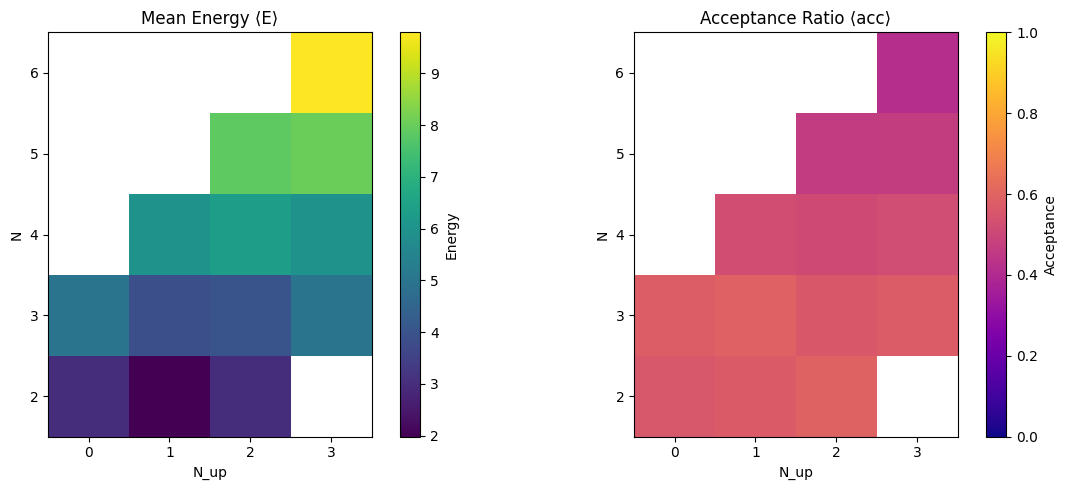

In [219]:
# Construct 2D arrays for plotting
N_vals = range(2, 7)
N_up_vals = range(0, 4)  # only up to 3

energy_matrix = np.full((len(N_vals), len(N_up_vals)), np.nan)
accept_matrix = np.full((len(N_vals), len(N_up_vals)), np.nan)

for i, N in enumerate(N_vals):
    for j, N_up in enumerate(N_up_vals):
        if N_up > N or (N - N_up) > 3:
            continue  # skip invalid configs
        key = (N, N_up)
        if key in energy:
            energy_matrix[i, j] = np.mean(energy[key])
        if key in accept:
            accept_matrix[i, j] = np.mean(accept[key])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Heatmap of Energy
im1 = ax1.imshow(energy_matrix, cmap='viridis', origin='lower')
ax1.set_xticks(range(len(N_up_vals)))
ax1.set_xticklabels(N_up_vals)
ax1.set_yticks(range(len(N_vals)))
ax1.set_yticklabels(N_vals)
ax1.set_xlabel('N_up')
ax1.set_ylabel('N')
ax1.set_title('Mean Energy ⟨E⟩')
fig.colorbar(im1, ax=ax1, label='Energy')

# Heatmap of Acceptance
im2 = ax2.imshow(accept_matrix, cmap='plasma', origin='lower', vmin=0, vmax=1)
ax2.set_xticks(range(len(N_up_vals)))
ax2.set_xticklabels(N_up_vals)
ax2.set_yticks(range(len(N_vals)))
ax2.set_yticklabels(N_vals)
ax2.set_xlabel('N_up')
ax2.set_ylabel('N')
ax2.set_title('Acceptance Ratio ⟨acc⟩')
fig.colorbar(im2, ax=ax2, label='Acceptance')

plt.tight_layout()
plt.show()


## Full-interacting case

Now set jj=True to switch on the Coulomb potential and so the Jastrow factor, we study the case $\omega=1$ and $\omega=1/2$

In [189]:
for j in range(2,4):
    for k in range(1,3):
        energy=0
        R = np.zeros((j,2))
        acc, counter=0,0
        for t in range(len(R)):
            for l in range(len(R[0])):
                R[t][l]=random.uniform(0,1)   #r[x o y][particella]


        delta = delta_choice(j, 0, R, sigma, b_par, b_anti, delta, counter, acc,N_delta,jj)

        for i in range(moves):
            R,acc, counter = Metropolis(j, 0, R, sigma, b_par, b_anti, delta, counter, acc ,jj)
            Kin = kinetic_energy_integrand(j,0,R,sigma,b_par,b_anti,k/2,use_chi=True)
            pot_en = potential_energy(omega,R)
       
            if i>=Neq:
                energy += (Kin+pot_en)
                if j == 2:
                    if k==1:
                        E_tot20.append((1/(i-Neq+1))*(energy))
                        acc_list20.append(acc/counter)
                    elif k==2:
                        E_tot21.append((1/(i-Neq+1))*(energy))
                        acc_list21.append(acc/counter)
                if j == 3:
                    if k==1:
                        E_tot30.append((1/(i-Neq+1))*(energy))
                        acc_list30.append(acc/counter)
                    elif k==2:
                        E_tot31.append((1/(i-Neq+1))*(energy))
                        acc_list31.append(acc/counter)        


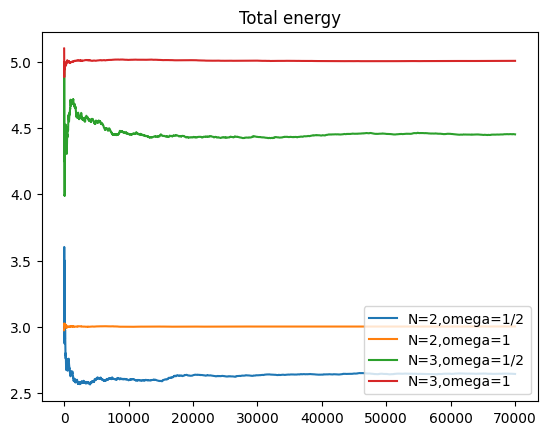

In [190]:
plt.plot(np.array(range(moves-Neq)),E_tot20,label='N=2,omega=1/2')
plt.plot(np.array(range(moves-Neq)),E_tot21,label='N=2,omega=1')
plt.plot(np.array(range(moves-Neq)),E_tot30,label='N=3,omega=1/2')
plt.plot(np.array(range(moves-Neq)),E_tot31,label='N=3,omega=1')
plt.title('Total energy')
plt.legend(loc="lower right")

Finally we minimize the energy with respect to b_par and b_anti 

In [19]:
sigma=1

R = np.zeros((N,2))
acc, counter=0,0
for i in range(len(R)):
    for j in range(len(R[0])):
        R[i][j]=random.uniform(0,1)   #r[x o y][particella]
        
delta=1
b_par=[i for i in np.arange(0.2,3.2,0.5)]
b_anti=[i for i in np.arange(0.2,3.2,0.5)]
E_b_min=np.zeros((len(b_par),len(b_anti)))
jj= True                    # use or not Jastrow
moves=100000
Neq=int(moves*3/10)
N_delta=1000

E_tot20=[]
E_tot21=[]
E_tot30=[]
E_tot31=[]

In [ ]:
for j in range(len(b_par)):
    for k in range(len(b_anti)):
        energy=0
        N=2
        N_up=0
        R = np.zeros((N,2))
        acc, counter=0,0
        for t in range(len(R)):
            for l in range(len(R[0])):
                R[t][l]=random.uniform(0,1)   #r[x o y][particella]


        delta = delta_choice(N, N_up, R, sigma, b_par[j], b_anti[k], delta, counter, acc,N_delta,jj)

        for i in range(moves):
            R,acc, counter = Metropolis(N, N_up, R, sigma, b_par[j], b_anti[k], delta, counter, acc ,jj)
            Kin = kinetic_energy_integrand(N,N_up,R,sigma,b_par[j],b_anti[k],omega=1,use_chi=True)
            pot_en = potential_energy(omega,R)
       
            if i>=Neq:
                energy += (Kin+pot_en)
                if i == moves-1:
                    E_b_min[j][k]=(1/(i-Neq+1))*(energy)


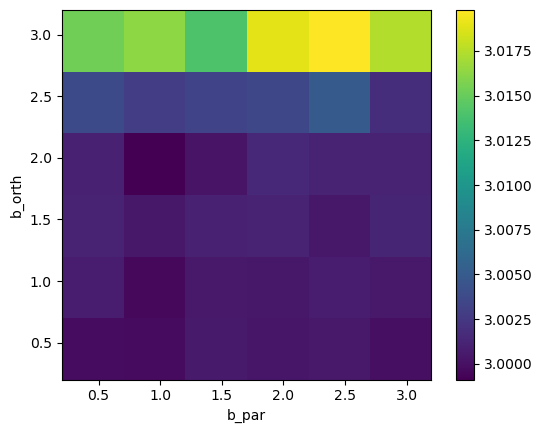

In [ ]:
plt.imshow(E_b_min,extent=[0.2, 3.2, 0.2, 3.2])
plt.colorbar()
plt.xlabel("b_par")
plt.ylabel("b_anti")
plt.show()


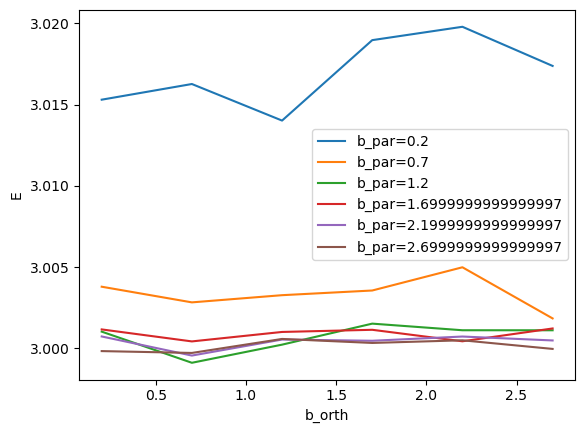

In [ ]:
for i in range(len(b_par)):
    plt.plot(b_anti,E_b_min[i][:], label='b_par={}'.format(b_par[i]))
    plt.legend()
    plt.xlabel("b_anti")
    plt.ylabel("E")

In [ ]:
for i in range(len(b_anti)):
    plt.plot(b_anti,E_b_min[:][i], label='b_par={}'.format(b_anti[i]))
    plt.legend()
    plt.xlabel("b_par")
    plt.ylabel("E")

In [ ]:
for j in range(len(b_par)):
    for k in range(len(b_anti)):
        energy=0
        N=2
        N_up=1
        R = np.zeros((N,2))
        acc, counter=0,0
        for t in range(len(R)):
            for l in range(len(R[0])):
                R[t][l]=random.uniform(0,1)   #r[x o y][particella]


        delta = delta_choice(N, N_up, R, sigma, b_par[j], b_anti[k], delta, counter, acc,N_delta,jj)

        for i in range(moves):
            R,acc, counter = Metropolis(N, N_up, R, sigma, b_par[j], b_anti[k], delta, counter, acc ,jj)
            Kin = kinetic_energy_integrand(N,N_up,R,sigma,b_par[j],b_anti[k],omega=1,use_chi=True)
            pot_en = potential_energy(omega,R)
       
            if i>=Neq:
                energy += (Kin+pot_en)
                if i == moves-1:
                    E_b_min[j][k]=(1/(i-Neq+1))*(energy)

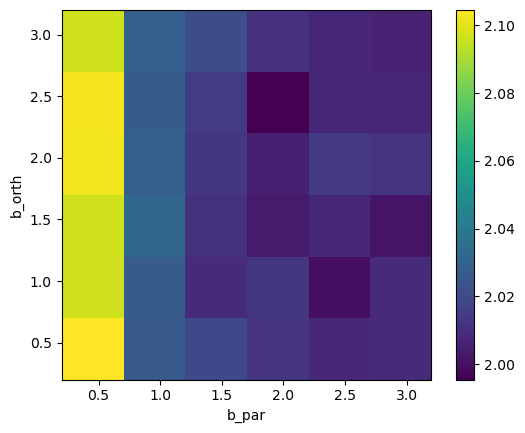

In [ ]:
plt.imshow(E_b_min,extent=[0.2, 3.2, 0.2, 3.2])
plt.colorbar()
plt.xlabel("b_par")
plt.ylabel("b_anti")
plt.show()

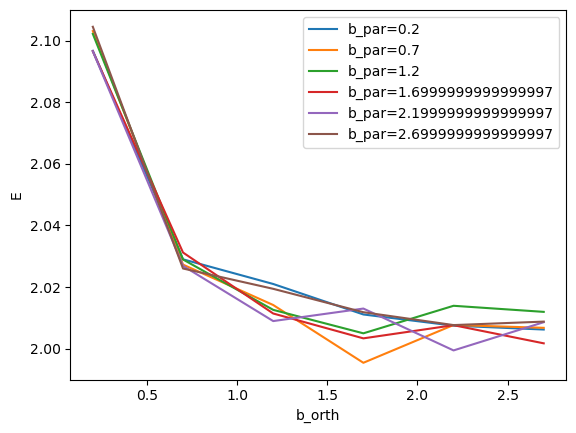

In [ ]:
for i in range(len(b_par)):
    plt.plot(b_anti,E_b_min[i][:], label='b_par={}'.format(b_par[i]))
    plt.legend()
    plt.xlabel("b_anti")
    plt.ylabel("E")


What we have seen is that in the case (N=2,N_up=0) the parameter that counts is b_par, viceversa in the case (N=2,N_up=1) the one that counts is b_anti. Fixed the unuseful parameter, larger the other minor the energy